# Basics of AC waves

:::{admonition} Goals
:class: tip
-  Familiarize with sine waves and their properties: amplitude, phase, frequency and period
:::

## Imports the numpy and matplotlib libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#****************************
# Setting up plot configurations
# Configurando gráficos
#****************************
#Adjusting fonts pattern
#Ajsutando fontes padrão dos gráficos
font = { 'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)
#Ajsutando espessura das linhas padrão dos gráficos
plt.rcParams['lines.linewidth'] = 2;

## Properties

### Amplitude,  period

(-1.1, 1.1)

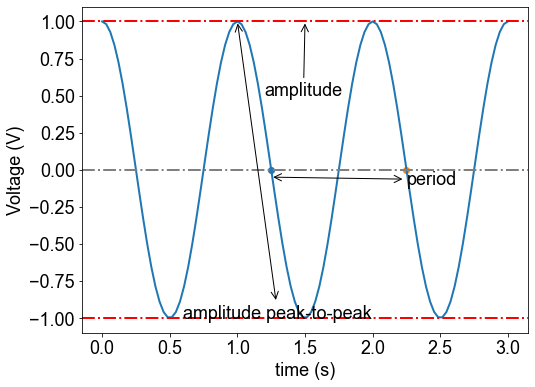

In [2]:
#------------------------
t = np.linspace(0, 3,100)
phi = 0
y0 = np.cos(2*np.pi*t+phi)
#criando vetores para representar
y1 = 0*t+1
y2 =  0*t-1
y3 =  0*t
#------------------------
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(t,y0)
ax.scatter(1.25,0)
ax.scatter(2.25,0)
ax.axhline( 0, linestyle='-.', color='gray')
ax.axhline( 1, linestyle='-.', color='red')
ax.axhline( -1, linestyle='-.', color='red')
#------------
plt.annotate(
        'amplitude',
        xy=(1.5,1), arrowprops=dict(arrowstyle='->'), xytext=(1.2, .5))
#------------
plt.annotate(
        'amplitude peak-to-peak',
        xy=(1,1), arrowprops=dict(arrowstyle='<->'), xytext=(0.6, -1))
#------------
plt.annotate(
        'period',
        xy=(1.25,-0.05), arrowprops=dict(arrowstyle='<->'), xytext=(2.25, -0.1))
##------------
plt.xlabel('time (s)')
plt.ylabel('Voltage (V)')
plt.ylim(1.1*np.array([-1.0,1.0]))
#------------------------------------
#fig.savefig('onda_ac.pdf')

## Average, DC level and RMS amplitude

Consider the following signal
$$y(t)=v_{dc}+v_0 \cos(\omega t +\phi)$$

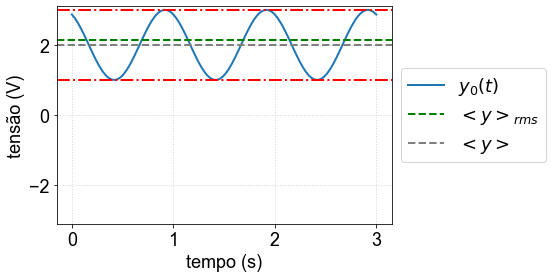

In [4]:
#--------
vdc = 2 # amplitude DC ou valor médio
v0 = 1 #amplitude
phi = np.pi/6 # fase
omega = 2*np.pi # frequencia angular
#--------
T = 2*np.pi/omega # período
t = np.linspace(0, 3*T, 100) # vetor de tempo
y0 = vdc + v0*np.cos(omega*t+phi)
#------------------------
yrms = np.sqrt(np.mean(y0**2)) # media rms
ymean = np.mean(y0) # media
ymax = np.max(y0) # maximo 
ymin = np.min(y0) # mínimo
#------------------------
fig, ax = plt.subplots()
ax.plot(t, y0, label = '$y_0(t)$')
# ax.plot(t, y0**2, linestyle='--',label = '$y_0(t)^2$')
#--
ax.axhline( yrms, linestyle='--', color='green', label='$<{y}>_{rms}$')
ax.axhline( ymean, linestyle='--', color='gray', label='$<{y}>$')
ax.axhline( ymax, linestyle='-.', color='red')
ax.axhline( ymin, linestyle='-.', color='red')
# ax.axhline(-v0)
# ax.plot(t,y3,'-k')
plt.grid(True)
plt.ylim([-np.max(y0)-0.1,np.max(y0)+0.1])
##------------
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.legend(bbox_to_anchor=(1.0, 0.5), loc='center left') # legenda de fora do gráfico
#------------------------------------
#fig.savefig('onda_ac_rms.pdf')

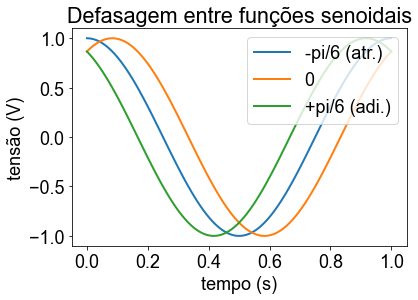

In [6]:
#------------------------
t = np.linspace(0, 1,100)
phi = np.pi/6
y0 = np.cos(2*np.pi*t)
y1 = np.cos(2*np.pi*t-phi)
y2 = np.cos(2*np.pi*t+phi)
#------------------------
# plt.xkcd()
fig = plt.figure()
fig1 = plt.plot(t,y0,t,y1,t,y2)
#
plt.title('Defasagem entre funções senoidais')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.ylim(1.1*np.array([-1.0,1.0]))
plt.legend(iter(fig1), ('-pi/6 (atr.)', '0','+pi/6 (adi.)'),loc='upper right')
#------------------------------------
#fig.savefig('defasagem1.pdf')

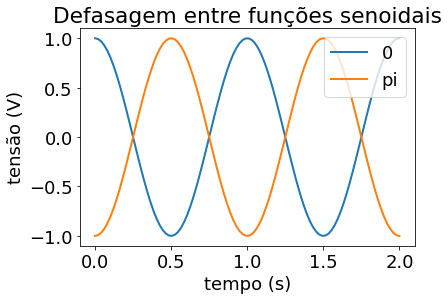

In [5]:
#------------------------
t = np.linspace(0, 2,100)
phi = np.pi
y0 = np.cos(2*np.pi*t)
y1 = np.cos(2*np.pi*t-phi)
#------------------------
#plt.xkcd()
fig = plt.figure()
fig1 = plt.plot(t,y0,t,y1)
#
plt.title('Defasagem entre funções senoidais')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.ylim(1.1*np.array([-1.0,1.0]))
plt.legend(iter(fig1), ('0','pi'),loc='upper right')
#------------------------------------
#fig.savefig('defasagem2.pdf')

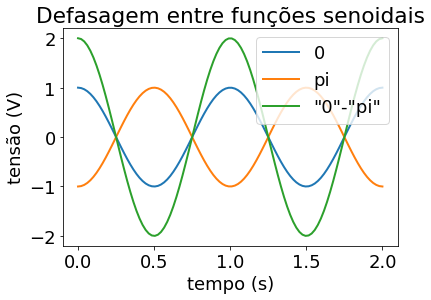

In [6]:
#------------------------
t = np.linspace(0, 2,100)
phi = np.pi
y0 = np.cos(2*np.pi*t)
y1 = np.cos(2*np.pi*t-phi)
#------------------------
# plt.xkcd()
fig = plt.figure()
fig1 = plt.plot(t,y0,t,y1,t,y0-y1)
#
plt.title('Defasagem entre funções senoidais')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.ylim(1.1*np.array([-2.0,2.0]))
plt.legend(iter(fig1), ('0','pi','"0"-"pi"'),loc='upper right')
#------------------------------------
#fig.savefig('defasagem3.pdf')

## Response function and Bode diagrams

In [36]:
omega=np.logspace(1,6,200)
C=1e-6;
L=50e-3;
R=200;
j=complex(0,1);
Xc=1/(omega*C);
Xl=omega*L;
#componente de saída: resistor
Hr = R/(R+j*(Xl-Xc))
Tr=np.abs(Hr)
Trdb=20*np.log10(Tr)
#componente de saída:capacitor
Hc = -j*Xc/(R+j*(Xl-Xc))
Tc=np.abs(Hc)
Tcdb=20*np.log10(Tc)
#componente de saída: indutor
Hl = j*Xl/(R+j*(Xl-Xc))
Tl=np.abs(Hl)
Tldb=20*np.log10(Tl)

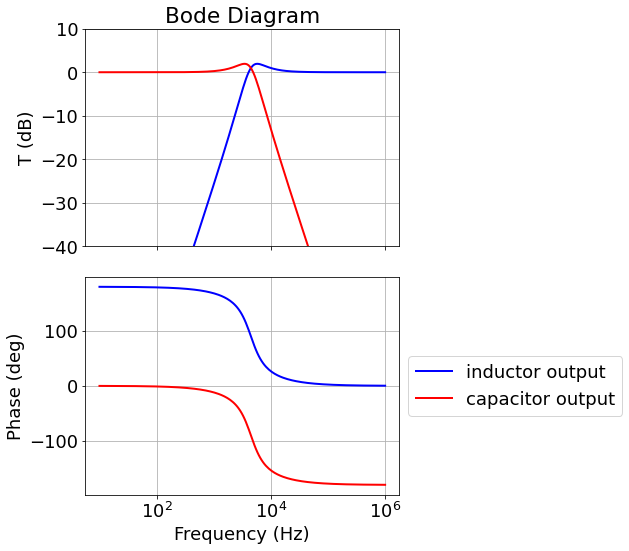

In [47]:
name='bode_rlc_l'
#plt.title('My first plot example, $alpha=\frac{2}{3}$')
#****************************
#AMPLITUDE
#****************************
fig,axs = plt.subplots(2,1,figsize=(6,8),sharex=True)
#-----
ax = axs[0]
ax.plot(omega,Tldb,'-b',linewidth=2,label='inductor output')
ax.plot(omega,Tcdb,'-r',linewidth=2,label='capacitor output')
ax.set_xscale('log')
ax.set_ylim((-40,10))
ax.set_title('Bode Diagram')
ax.set_ylabel('T (dB)')
ax.grid(True)
#-----
ax = axs[1]
ax.plot(omega,np.angle(Hl,deg=True),'-b',linewidth=2,label='inductor output')
ax.plot(omega,np.angle(Hc,deg=True),'-r',linewidth=2,label='capacitor output')
ax.set_xscale('log')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase (deg)')
ax.grid(True)
#-----
plt.tight_layout()
ax.legend(bbox_to_anchor = [1.0,0.5],loc='center left')